# HW1  Gradient descent (Due: January 19, 2024, 11:59 PM) 


Please submit this Jupyter notebook with your solutions. The solutions should include the code, explanations, and the output of all the cells. Submitting your solutions without running your code will lead to a deduction of points.

For problems that refer to a cost function without specifying it, assume the cost function from the previous question.

Also, note that you should cite all the references you refer to under each question. Proper referencing is essential for academic integrity, giving credit to original authors, avoiding plagiarism, and providing a traceable path for verification. Please check the course syllabus for more details about academic integrity.

0) [0 points] You are allowed to engage in discussions about homework assignments; however, it is crucial that you independently write down your own code and solutions. Additionally, if you discuss the assignment with other students, please explicitly mention their names below.

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{33}\left(w^3 + w^2 + 33w - 33 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{33}\left(3w^2 + 2w + 33 \right)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [151]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha, max_its, w0):
    
    ## Your code here
    w = w0
    cost_history = [g(w)]
    
    # Iterate through specified number of iterations
    for _ in range(max_its):
        
        # Update weights using gradient descent formula
        w -= alpha * dw(w)
        
        # Record cost after each iteration
        cost_history.append(g(w))
        
    return cost_history

def g(w) : return 1/33 * (w**3 + w**2 + 33 * w - 33)
def dw(w) : return 1/33 * (3 * w**2 + 2 * w + 33)


3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.95
max_its = 500

# first run
alpha = 0.01
# second run
alpha = 0.005
# third run
alpha = 0.001


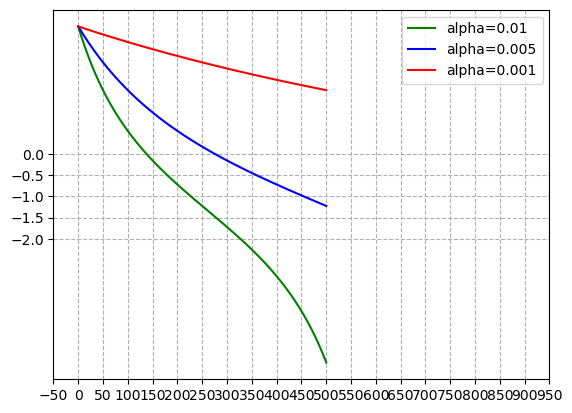

In [152]:
import matplotlib.pyplot as plt
import numpy as np

max_steps = 500
steps = list(range(max_steps + 1))
alpha_1 = gradient_descent(0.01, 500, 2.95)
alpha_2 = gradient_descent(0.005, 500, 2.95)
alpha_3 = gradient_descent(0.001, 500, 2.95)

plt.plot(steps, alpha_1, color="green", label='alpha=0.01')
plt.plot(steps, alpha_2, color="blue", label='alpha=0.005')
plt.plot(steps, alpha_3, color="red",label='alpha=0.001')

plt.xticks(np.arange(-50, 1000, 50))
plt.yticks(np.arange(-2, 0.5, 0.5))
plt.grid(linestyle="--")

plt.legend(loc="upper right")

plt.show()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = |w|
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, the function is convex.

$$
g(w) = \left \vert w \right \vert = \begin{cases}
  -w & \text{if } w < 0 \\
  0 & \text{if } w = 0 \\
  w & \text{if } w > 0
\end{cases}
$$

The global minimum occurs at $w = 0$

5) [5 points] What is the derivative of the cost function? 
$$
g'(w) = \frac{w}{\left \vert w \right \vert} = \begin{cases}
  -1 & \text{if } w < 0 \\
  \mathbf{undefined} & \text{if } w = 0 \\
  1 & \text{if } w > 0
\end{cases}
$$

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [153]:
from autograd import grad 
import autograd.numpy as np

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    
    # Use autograd to compute gradient of cost function
    gradient = grad(g)
    
    # Initialize weights and recording history
    w = w0
    weight_history = [w]
    cost_history = [g(w)]
    
    # 1. Iterate through
    for step in range(max_its):

        # 2. Update weights using gradient descent
        w -= alpha * gradient(w)
        
        # 3. Record cost and weight history
        cost_history.append(g(w))
        weight_history.append(w)
        
    return weight_history, cost_history

def g(w: int) : return np.abs(w)


7) [10 points] Make a run of max_its=30 steps of gradient descent with initialization at the point $w^0 = 1.6$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

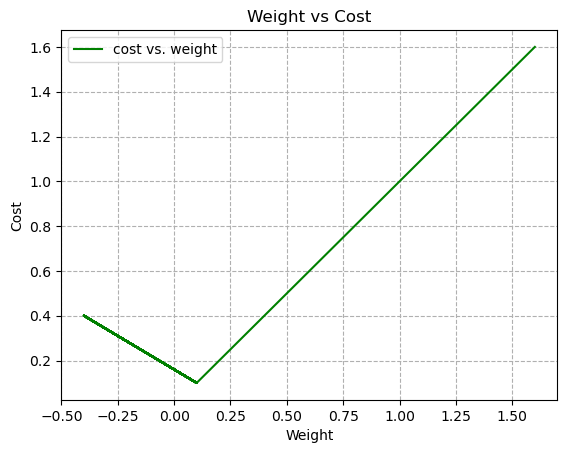

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set max number of iterations
max_its = 30
# Run gradient descent to obtain weight and cost history
weight_history, cost_history = gradient_descent(g, 0.5, max_its, 1.6)

# Plot cost as a function of weight for each step
plt.plot(weight_history, cost_history, color="green", label='cost vs. weight')

plt.title("Weight vs Cost")
plt.xlabel("Weight")
plt.ylabel("Cost")

plt.xticks(np.arange(-0.5, 2, 0.25))
plt.yticks(np.arange(-0.2, 2, 0.2))
plt.grid(linestyle="--")
plt.locator_params(nbins = max_its)
plt.legend(loc="upper left")
plt.locator_params(nbins = max_its)

plt.show()


8) [15 points] Make a run of max_its=30 steps of gradient descent with initialization at the point $w^0 = 1.6$, using the diminishing rule $\alpha = \frac{1}{k^{1.5}}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wiehgt history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

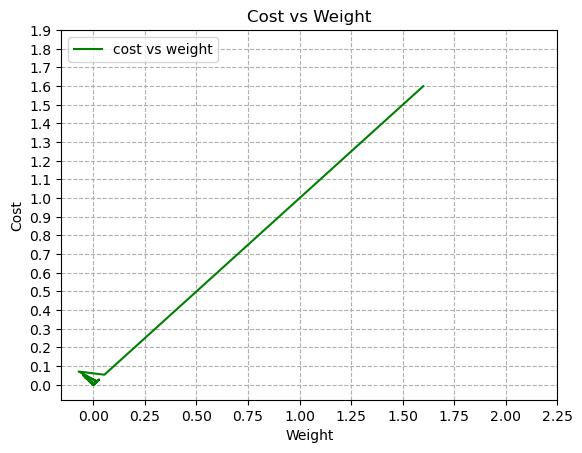

In [155]:
from autograd import grad
import autograd.numpy as np

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function 
    
    # Initializing weights and recording history 
    w = w0
    weight_history = [w]
    cost_history = [g(w)]
    
    # Iterating through the specified number of steps
    for step in range(1, max_its+1):
        if alpha == 'diminishing':
            a = 1 / (step**1.5)
        else:
            a = alpha
        
        # Updating weights using gradient descent
        w -= a * gradient(w)
        
        # Recording cost and weight history
        cost_history.append(g(w))
        weight_history.append(w)

    return weight_history, cost_history

# Define a simple cost function g(w)
def g(w: int) : return np.abs(w)

# -----------------------------

# Setting parameters for gradient descent
max_its = 30
weight_history, cost_history = gradient_descent(g, "diminishing", max_its, 1.6)

# Plotting the cost vs. weight curve
plt.plot(weight_history, cost_history, color="green", label='cost vs weight')

plt.title("Cost vs Weight")
plt.xlabel("Weight")
plt.ylabel("Cost")

plt.legend(loc="upper left")
plt.xticks(np.arange(0, 2.5, 0.25))
plt.yticks(np.arange(0, 2, 0.1))
plt.grid(linestyle="--")

plt.show()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why?

- **Using $\alpha = 0.5$, the system appears to oscillate.**
- **Using $\alpha = \frac{1}{k}$, the system converges to $g(w) \approx 0$. It attains better results than with $\alpha = 0.5$ &mdash; perhaps because it converges.


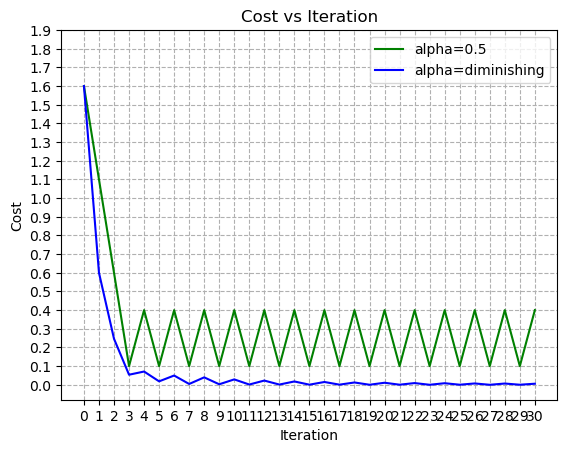

In [156]:
import matplotlib.pyplot as plt
import autograd.numpy as np
%matplotlib inline


max_steps = 30

steps = list(range(max_steps + 1))
_, cost_history1 = gradient_descent(g, 0.5, max_steps, 1.6)
_, cost_history2 = gradient_descent(g, "diminishing", max_steps, 1.6)

plt.plot(steps, cost_history1, color="green", label="alpha=0.5")
plt.plot(steps, cost_history2, color="blue", label="alpha=diminishing")

plt.title("Cost vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.legend(loc="upper right")
plt.xticks(steps)
plt.yticks(np.arange(0, 2, 0.1))
plt.grid(linestyle="--")

plt.legend()

plt.show()

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 3\sin(w_0 + 3w_1) + 10$ 

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [157]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  
    ##Your code here
    w = w0
    weight_history = [w]
    cost_history = [g(w)]
    
    # Iterate through
    for _ in range(max_its):

        # Gradient descent
        w -= alpha * gradient(w)
        
        # Record values
        cost_history.append(g(w))
        weight_history.append(w)
        
    return weight_history, cost_history

g = lambda w: w[0]**2 + w[1]**2 + 3*np.sin(w[0] + 3*(w[1])) + 10


11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [10.0,-10.0]
max_its = 30

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



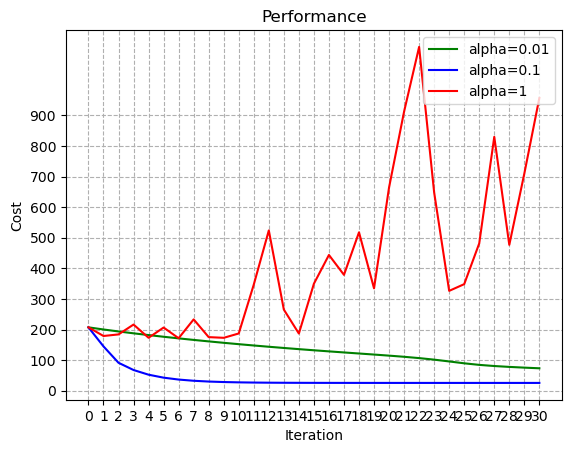

In [158]:
import autograd.numpy as np
#Your code here

import matplotlib.pyplot as plt
max_its = 30

steps = list(range(max_its + 1))
_, cost_history1 = gradient_descent(g, 0.01, max_its, np.array([10.0, -10.0]))
_, cost_history2 = gradient_descent(g, 0.1, max_its, np.array([10.0, -10.0]))
_, cost_history3 = gradient_descent(g, 1, max_its, np.array([10.0, -10.0]))

plt.plot(steps, cost_history1, color="green", label="alpha=0.01")
plt.plot(steps, cost_history2, color="blue", label="alpha=0.1")
plt.plot(steps, cost_history3, color="red", label="alpha=1")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(loc="upper right")
plt.yticks(range(0, 1000, 100))
plt.xticks(steps)
plt.grid(linestyle="--")

plt.show()

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 3w_0^2 + 2w_1^2 +3w_2^2$

Assume your $w^0$= [1,2,1] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha. Generate a single plot of the cost as a function of the number of iterations. What was your intuition for the selection of alpha values? Which value of alpha seems to converge the fastest?

Note that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

- **$\alpha = 0.25$ converges the fastest.**
- **The selection of alpha values was based on my intuition of choosing values that balance convergence speed and stability.**

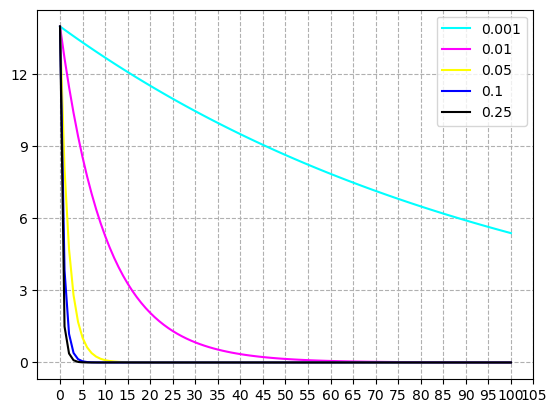

In [159]:
from autograd import grad 
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# cost function
g = lambda x: 3*(x[0]**2) + 2*(x[1]**2) + 3*(x[2]**2)

max_its = 100
steps = list(range(max_its + 1))

weights, costs = gradient_descent(g, 0.001, max_its, np.array([1.0,2.0,1.0]))
plt.plot(steps, costs, color="cyan", label="0.001")

weights, costs = gradient_descent(g, 0.01, max_its, np.array([1.0,2.0,1.0]))
plt.plot(costs, color="magenta", label="0.01")

weights, costs = gradient_descent(g, 0.05, max_its, np.array([1.0,2.0,1.0]))
plt.plot(steps, costs, color="yellow", label="0.05")

weights, costs = gradient_descent(g, 0.1, max_its, np.array([1.0,2.0,1.0]))
plt.plot(steps, costs, color="blue", label="0.1")

weights, costs = gradient_descent(g, 0.25, max_its, np.array([1.0,2.0,1.0]))
plt.plot(steps, costs, color="black", label="0.25")

plt.legend(loc="upper right")
plt.xticks(range(0, 110, 5))
plt.yticks(range(0, 15, 3))
plt.grid(linestyle="--")
plt.show()